In [1]:
import os
import cv2
import tensorflow as tf
from pdf2image import convert_from_path
path="/home/yasmine/Téléchargements/data/01/"
path1="/home/yasmine/Téléchargements/data/02/"
path2="/home/yasmine/Téléchargements/data/03/"
path3="/home/yasmine/Téléchargements/data/11/"
i=0
img_size=224 #224 recomended

lables=[]
data=[]
#res = cv2.resize(RGB_img, dsize=(img_size, img_size),interpolation=cv2.INTER_CUBIC)
for filename in os.listdir(path):
    print(filename)
    images = convert_from_path(path+filename)
    #for i in range(len(images)):
    # Save pages as images in the pdf
    images[0].save('/home/yasmine/Téléchargements/data_img/img'+str(i)+'.jpg', 'JPEG')
    image = cv2.imread('/home/yasmine/Téléchargements/data_img/img'+str(i)+'.jpg')
    image = cv2.resize(image, (img_size,img_size))
    image = tf.keras.preprocessing.image.img_to_array(image)
    data.append(image)
    i=i+1
    lables.append(0)
for filename in os.listdir(path1):
    images = convert_from_path(path1+filename)
    #for i in range(len(images)):
    # Save pages as images in the pdf
    images[0].save('/home/yasmine/Téléchargements/data_img/img'+str(i)+'.jpg', 'JPEG')
    image = cv2.imread('/home/yasmine/Téléchargements/data_img/img'+str(i)+'.jpg')
    image = cv2.resize(image, (img_size,img_size))
    image = tf.keras.preprocessing.image.img_to_array(image)
    data.append(image)
    i=i+1
    lables.append(1)
for filename in os.listdir(path2):
    images = convert_from_path(path2+filename)
    #for i in range(len(images)):
    # Save pages as images in the pdf
    images[0].save('/home/yasmine/Téléchargements/data_img/img'+str(i)+'.jpg', 'JPEG')
    image = cv2.imread('/home/yasmine/Téléchargements/data_img/img'+str(i)+'.jpg')
    image = cv2.resize(image, (img_size,img_size))
    image = tf.keras.preprocessing.image.img_to_array(image)
    data.append(image)
    i=i+1
    lables.append(2)
for filename in os.listdir(path3):
    images = convert_from_path(path3+filename)
    #for i in range(len(images)):
    # Save pages as images in the pdf
    images[0].save('/home/yasmine/Téléchargements/data_img/img'+str(i)+'.jpg', 'JPEG')
    image = cv2.imread('/home/yasmine/Téléchargements/data_img/img'+str(i)+'.jpg')
    image = cv2.resize(image, (img_size,img_size))
    image = tf.keras.preprocessing.image.img_to_array(image)
    data.append(image)
    i=i+1
    lables.append(3)

2022-04-24 22:05:35.484163: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-24 22:05:35.484247: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


06072020_029_01_8i2bw.pdf
06072020_029_01_n3f50.pdf
06072020_029_01_q72cf.pdf
06072020_029_01_pe471.pdf
06072020_029_01_apy5i.pdf
06072020_029_01_uc72e.pdf
06072020_029_01_yxgk2.pdf
06072020_029_01_y8x6g.pdf


In [2]:
print(len(data))
print(data[0].shape)
#print(data[0])
import numpy as np
from tensorflow.keras.utils import to_categorical
train_lables=to_categorical(lables)
#print(train_lables)
train_images= np.array(data)
#train_lables = np.array(train_lables)

print(train_lables.shape)

153
(224, 224, 3)
(153, 4)


In [3]:
# construct the image generator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.05,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [4]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_lables, test_lables = train_test_split(train_images, train_lables, 
                                                    test_size=0.2,
                                                    random_state = 47)

In [5]:
print(train_images.shape)
print(train_lables.shape)
print(test_images.shape)
print(test_lables.shape)

(122, 224, 224, 3)
(122, 4)
(31, 224, 224, 3)
(31, 4)


In [6]:
print(test_lables)

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [7]:
import numpy as np # linear algebra
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.callbacks import Callback
import os
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
import seaborn as sns


SIZE = 224 #224 recomended as it is default for VGG16

#train_images = np.load('Train_Data/images_train.npy') #Loading Data Generated by test_train_generator.py
#train_labels = np.load('Train_Data/labels_train.npy')
print('Training Data Loaded Successfully...')
train_images,train_labels = shuffle(train_images,train_lables)

''' Initializing the VGG16 with imagenet pretrained weights, with out including top 3 layers,
Addition of custom layers and All layers of VGG16 is set to trainable'''

class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') is not None and logs.get('accuracy')>=0.95):
          print("\nReached 95% accuracy so cancelling training!")
          self.model.stop_training = True

callbacks = myCallback()

model = VGG16(input_shape=(SIZE, SIZE, 3),weights='imagenet', include_top=False)
for layer in model.layers:
    layer.trainable=True #setting VGG Layers to trainable
output = model.output
output = Flatten()(output)
output = Dense(500,activation='relu')(output)
output = Dense(50,activation='relu')(output)
finallayer = Dense(4, activation='softmax')(output) #Here the number of output classes are 4, initialize with yours

updated_model = Model(inputs = model.input, outputs=finallayer)

updated_model.compile(optimizer = Adam(lr = 1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])


print(updated_model.summary())

 

Training Data Loaded Successfully...


2022-04-24 22:07:12.494889: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-24 22:07:12.494983: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (yasmine-Lenovo-ideapad-130-15IKB): /proc/driver/nvidia/version does not exist
2022-04-24 22:07:12.530802: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/home/yasmine/jupyter/environment/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
history = updated_model.fit(aug.flow(train_images,train_labels, batch_size=32), validation_data=aug.flow(train_images, train_lables, batch_size=8),epochs=50, verbose=2, shuffle=True,callbacks=[callbacks])


Epoch 1/50


2022-04-24 22:07:19.564814: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2022-04-24 22:07:19.960079: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2022-04-24 22:07:21.106024: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 205520896 exceeds 10% of free system memory.
2022-04-24 22:07:21.397871: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 205520896 exceeds 10% of free system memory.
2022-04-24 22:07:38.379783: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 205520896 exceeds 10% of free system memory.


4/4 - 118s - loss: 4.2446 - accuracy: 0.4426 - val_loss: 2.2495 - val_accuracy: 0.4836 - 118s/epoch - 29s/step
Epoch 2/50
4/4 - 102s - loss: 1.0280 - accuracy: 0.6230 - val_loss: 1.4994 - val_accuracy: 0.4508 - 102s/epoch - 26s/step
Epoch 3/50
4/4 - 102s - loss: 0.7258 - accuracy: 0.7213 - val_loss: 1.8230 - val_accuracy: 0.4836 - 102s/epoch - 26s/step
Epoch 4/50
4/4 - 103s - loss: 0.6429 - accuracy: 0.7541 - val_loss: 2.4374 - val_accuracy: 0.4344 - 103s/epoch - 26s/step
Epoch 5/50
4/4 - 103s - loss: 0.5961 - accuracy: 0.8361 - val_loss: 2.7041 - val_accuracy: 0.4180 - 103s/epoch - 26s/step
Epoch 6/50
4/4 - 103s - loss: 0.3668 - accuracy: 0.8525 - val_loss: 2.9009 - val_accuracy: 0.4918 - 103s/epoch - 26s/step
Epoch 7/50
4/4 - 104s - loss: 0.8676 - accuracy: 0.6721 - val_loss: 2.4529 - val_accuracy: 0.4508 - 104s/epoch - 26s/step
Epoch 8/50
4/4 - 102s - loss: 0.8620 - accuracy: 0.7623 - val_loss: 2.1362 - val_accuracy: 0.3689 - 102s/epoch - 25s/step
Epoch 9/50
4/4 - 103s - loss: 0.767

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


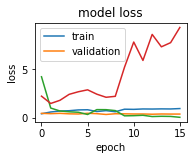

Press any key to continue...
Training has finished...
Test Data Loaded Successfully...
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         5

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



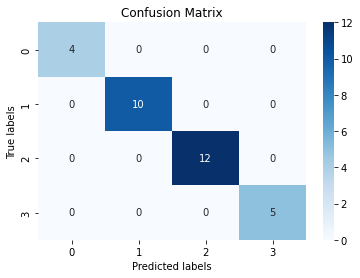

Model is saved in Model directory...


In [9]:

'''Plotting Training History'''

print(history.history.keys())
plt.subplot(224)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  # If you feed validation data / split data for validation
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# plt.show()
# summarize history for loss
plt.subplot(224)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  # If you feed validation data / split data for validation
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print('Press any key to continue...')
#plt.waitforbuttonpress(timeout=- 1)
plt.close()

#del train_images
#del train_labels
print('Training has finished...')


'''Testing the model and producing classification report, confusion matrix'''

#test_images = np.load('Test_Data/images_test.npy')
#test_labels = np.load('Test_Data/labels_test.npy')
print('Test Data Loaded Successfully...')
predicted_labels = updated_model.predict(test_images).argmax(axis=1)
test_lables = test_lables.argmax(axis=1)

print(accuracy_score(test_lables, predicted_labels))
cm=confusion_matrix(test_lables, predicted_labels)
print(classification_report(test_lables, predicted_labels))
#print(confusion_matrix(test_labels.argmax(axis=1), y_pred.argmax(axis=1)))

ax= plt.subplot()
sns.heatmap(cm, fmt='g',annot=True, ax = ax,cmap=plt.cm.Blues) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
#ax.xaxis.set_ticklabels(['cheque','retrait','versement','ordre'])
#ax.yaxis.set_ticklabels(['cheque','retrait','versement','ordre'])

plt.show()


'''Saving the model'''
updated_model.save("VGG16_DocClassifierv3.model", save_format="h5")

#model.save('VGG16_DocClassifier.h5')

print("Model is saved in Model directory...")  

In [11]:
from tensorflow.keras.models import load_model

model = load_model('VGG16_DocClassifierv3.model')


In [12]:
#images[0].save('/home/yasmine/Téléchargements/data_img/img0.jpg', 'JPEG')
image = cv2.imread('/home/yasmine/Téléchargements/2 29/20200716-00100001.pdf')
image = cv2.resize(image, (224,224))
image = tf.keras.preprocessing.image.img_to_array(image)

error: OpenCV(4.5.2) /tmp/pip-req-build-dzetuct2/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [42]:
print(np.array(image).shape)
print(image.reshape(1,224,224,3).shape)
image=image.reshape(1,224,224,3)

(224, 224, 3)
(1, 224, 224, 3)


In [43]:
predicted_labels = model.predict(image)


In [44]:
print(predicted_labels)

[[1.11392954e-04 4.85176824e-05 1.21359284e-04 9.99718726e-01]]


In [45]:
for i in predicted_labels :
    if max(i)>=0.7:
        if max(i)==i[0]:
            print("document de classe 0")
        elif max(i)==i[1]:
            print("document de classe 1")
        elif max(i)==i[2]:
            print("document de classe 2")
        else:
            print("document de classe 3")
    else:
        print("classe non connue")
    

document de classe 3
